In [112]:
from IPython import get_ipython


In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
get_ipython().run_line_magic('matplotlib', 'inline')

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime



In [114]:
#we are analyzing the stock Apple google Microsoft, Amazon
tech_list =['AAPL', 'GOOG', 'MSFT', 'AMZN']

#Set up End and Start times for data Grabs
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

#for loop for grabing yahoo finance data and seting as a data frame
for stock in tech_list:
    #set dataframe as stock ticker
    globals()[stock] = DataReader(stock, 'yahoo', start,end)



In [115]:
company_list = [AAPL, GOOG, MSFT, AMZN] 
company_name = ['APPLE', 'GOOGLE','MICROSOFT', 'AMAZON']

for company, company_name in zip(company_list, tech_list):
    company['company_name'] = company_name

df = pd.concat(company_list, axis=0)
df.tail(10)



High          Low         Open        Close     Volume  \
Date                                                                        
2020-08-28  3433.370117  3386.500000  3423.000000  3401.800049  2897000.0   
2020-08-31  3495.000000  3405.000000  3408.989990  3450.959961  4185900.0   
2020-09-01  3513.870117  3467.000000  3489.580078  3499.120117  3476400.0   
2020-09-02  3552.250000  3486.689941  3547.000000  3531.449951  3931500.0   
2020-09-03  3488.409912  3303.000000  3485.000000  3368.000000  8161100.0   
2020-09-04  3381.500000  3111.129883  3318.000000  3294.620117  8781800.0   
2020-09-08  3250.850098  3130.000000  3144.000000  3149.840088  6094200.0   
2020-09-09  3303.179932  3185.000000  3202.989990  3268.610107  5188700.0   
2020-09-10  3349.889893  3170.550049  3307.219971  3175.110107  5330700.0   
2020-09-11  3217.340088  3083.979980  3208.689941  3116.219971  5087700.0   

              Adj Close company_name  
Date                                  
2020-08-28  3401.800049         AMZN  
2020-08-31  3450.959961         AMZN  
2020-09-01  3499.120117         AMZN  
2020-09-02  3531.449951         AMZN  
2020-09-03  3368.000000         AMZN  
2020-09-04  3294.620117         AMZN  
2020-09-08  3149.840088         AMZN  
2020-09-09  3268.610107         AMZN  
2020-09-10  3175.110107         AMZN  
2020-09-11  3116.219971         AMZN

In [116]:
AAPL.describe()
AAPL.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-09-12 to 2020-09-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


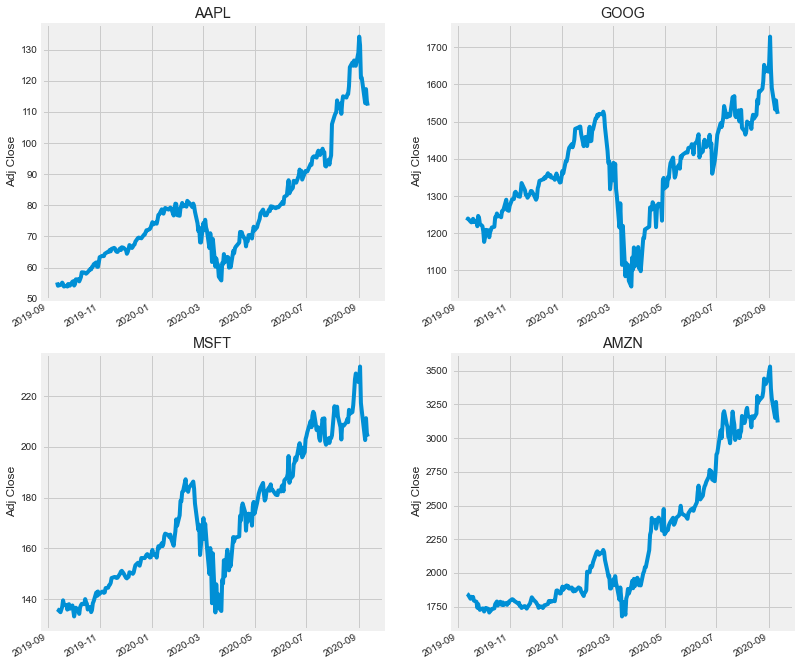

In [117]:
#let see the histrocial view of the  closing proce

plt.figure(figsize=(12,8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i-1]}")



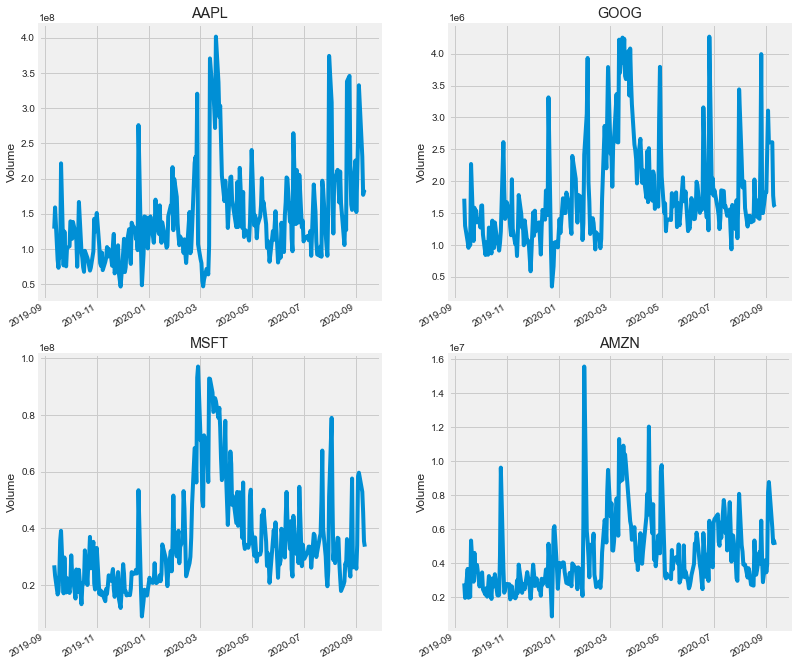

In [118]:
## now the plot the total Volume of stock being traded each day

plt.figure(figsize =(12,8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i-1]}")
    



In [119]:
##2. What was the moving Average of the stock 
ma_day =[10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
print(AMZN.columns)



Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


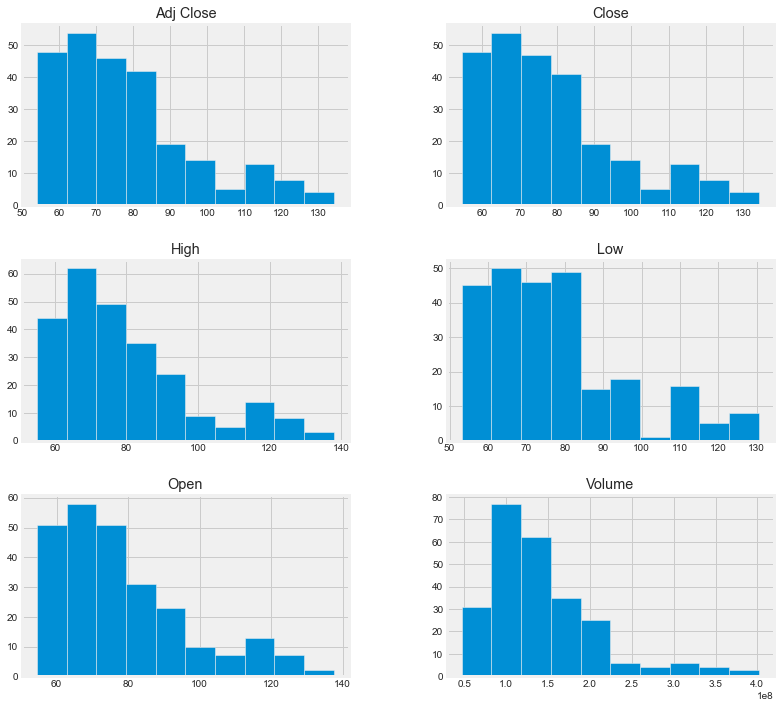

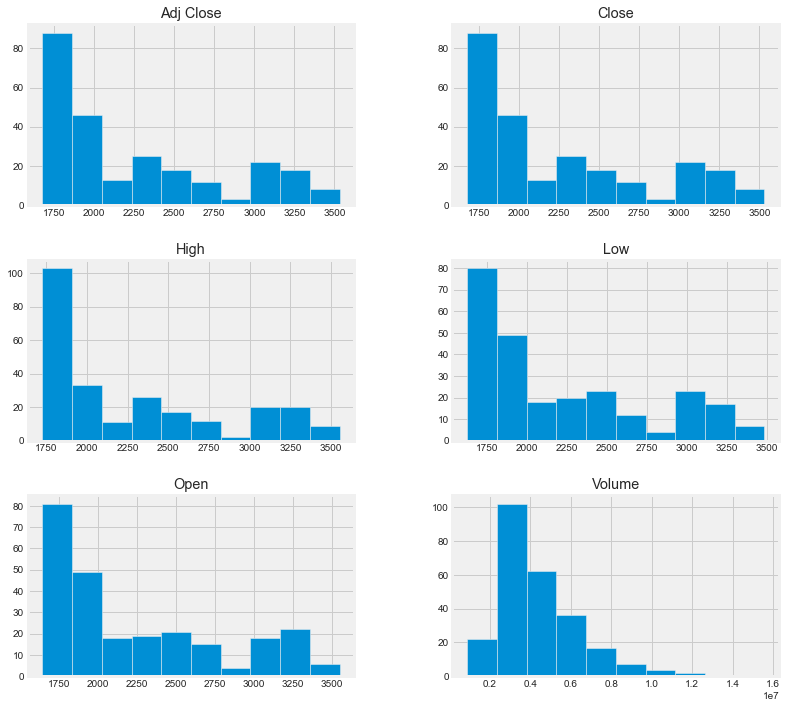

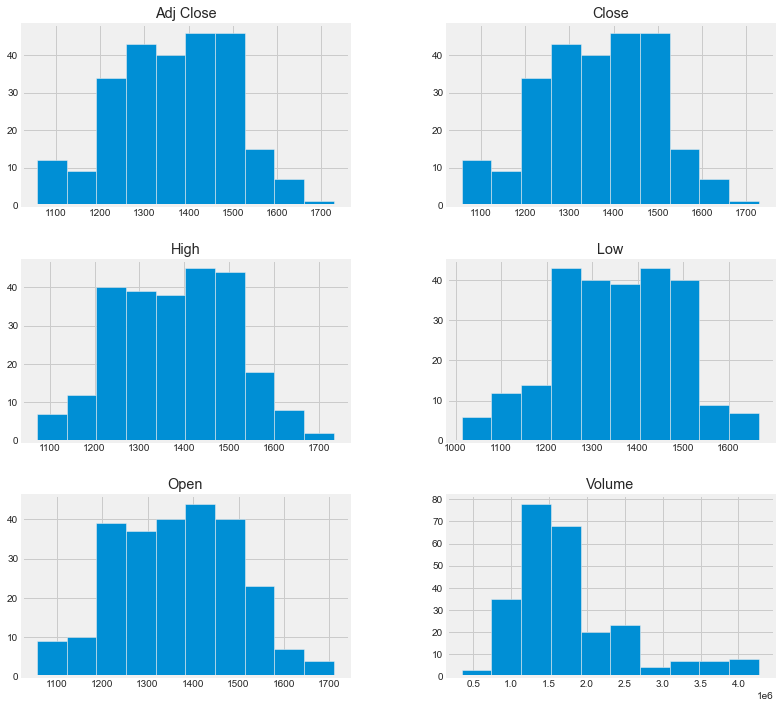

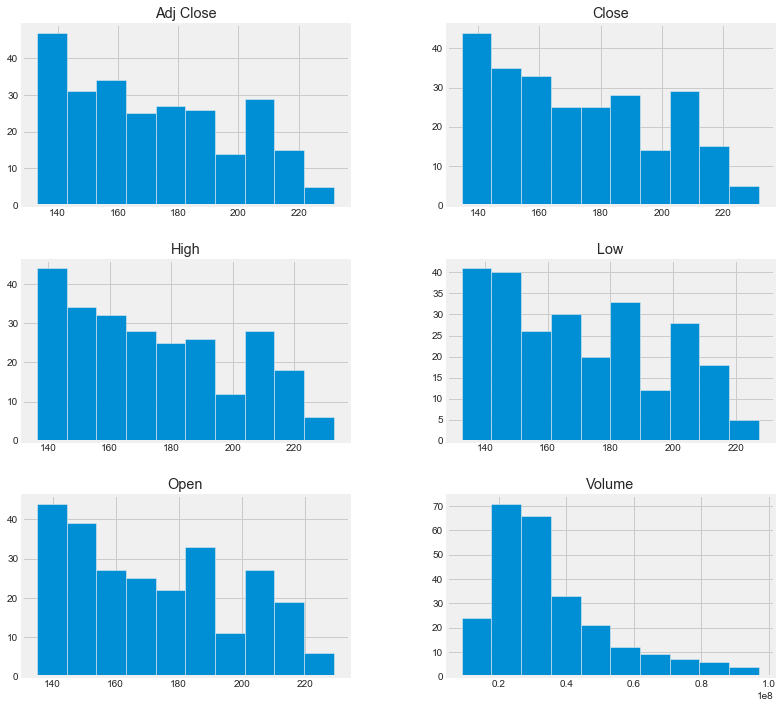

In [120]:

#Grab all the moving Average
df.groupby("company_name").hist(figsize=(12,12));



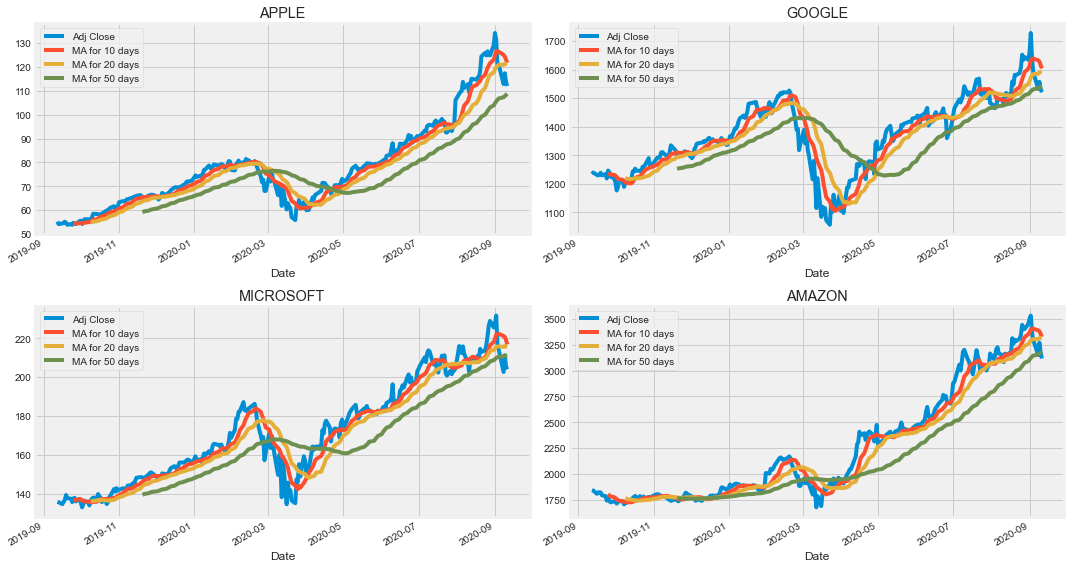

In [121]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


fig.tight_layout()



In [122]:
#Daily return on the stock 
# We'll use the pct_change to find percentage change for each day 



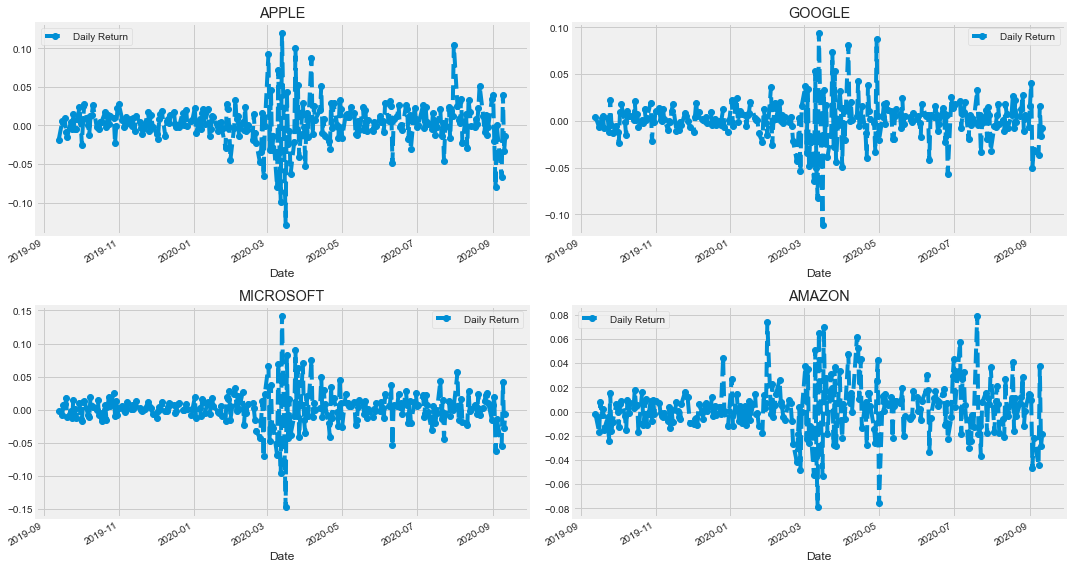

In [123]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()
#use the drop NAN and draw daily return of the stock 



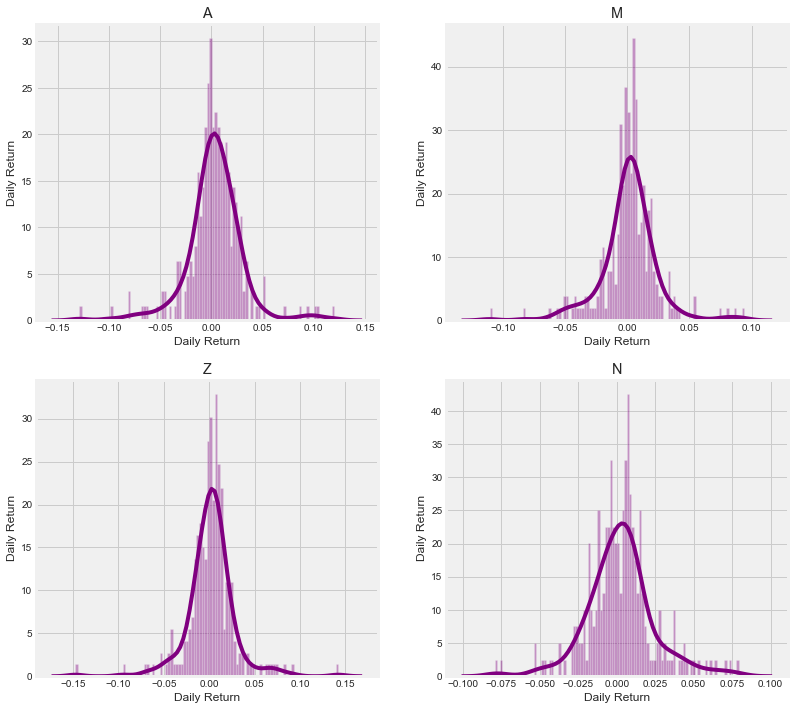

In [124]:
plt.figure(figsize=(12,12))

for i, company in enumerate(company_list, 1):
     plt.subplot(2,2,i)
     sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
     plt.ylabel('Daily Return')
     plt.title(f'{company_name[i-1]}')



In [125]:
#4. what is the correlation between differnet stocks closing prices
closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']
#take a quick look at the closing df
closing_df.head(10)



Symbols          AAPL         GOOG        MSFT         AMZN
Date                                                       
2019-09-12  55.224567  1234.250000  135.972031  1843.550049
2019-09-13  54.150230  1239.560059  135.774261  1839.339966
2019-09-16  54.434902  1231.300049  134.795425  1807.839966
2019-09-17  54.632942  1229.150024  135.843506  1822.550049
2019-09-18  55.145359  1232.410034  136.960770  1817.459961
2019-09-19  54.697304  1238.709961  139.482071  1821.500000
2019-09-20  53.897728  1229.930054  137.870407  1794.160034
2019-09-23  54.142803  1234.030029  137.573776  1785.300049
2019-09-24  53.885353  1218.760010  135.833603  1741.609985
2019-09-25  54.714626  1246.520020  137.791306  1768.329956

In [126]:
#make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()



Symbols         AAPL      GOOG      MSFT      AMZN
Date                                              
2019-09-12       NaN       NaN       NaN       NaN
2019-09-13 -0.019454  0.004302 -0.001454 -0.002284
2019-09-16  0.005257 -0.006664 -0.007209 -0.017126
2019-09-17  0.003638 -0.001746  0.007775  0.008137
2019-09-18  0.009379  0.002652  0.008225 -0.002793

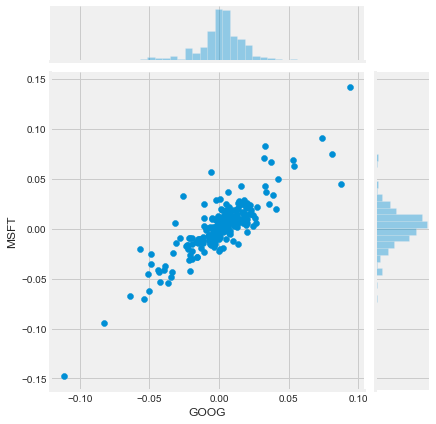

In [127]:
#compare return of Google and Microsoft. Obviously, two stocks are perfectly correlated with each other a linear relationship between its daily return values should occur.
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter')
#



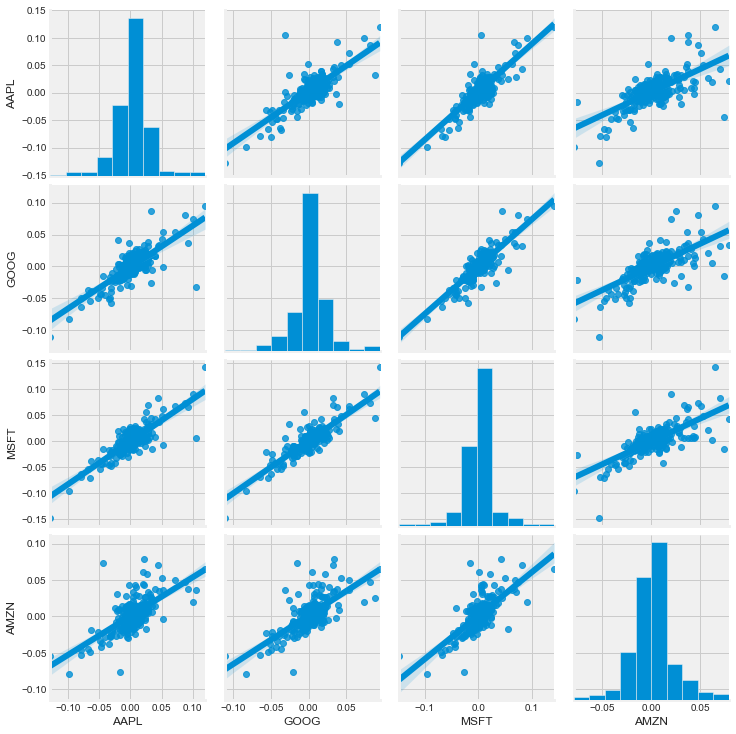

In [128]:
#use pairplot on our DataFrame for an automatic visual analysis
sns.pairplot(tech_rets, kind='reg')


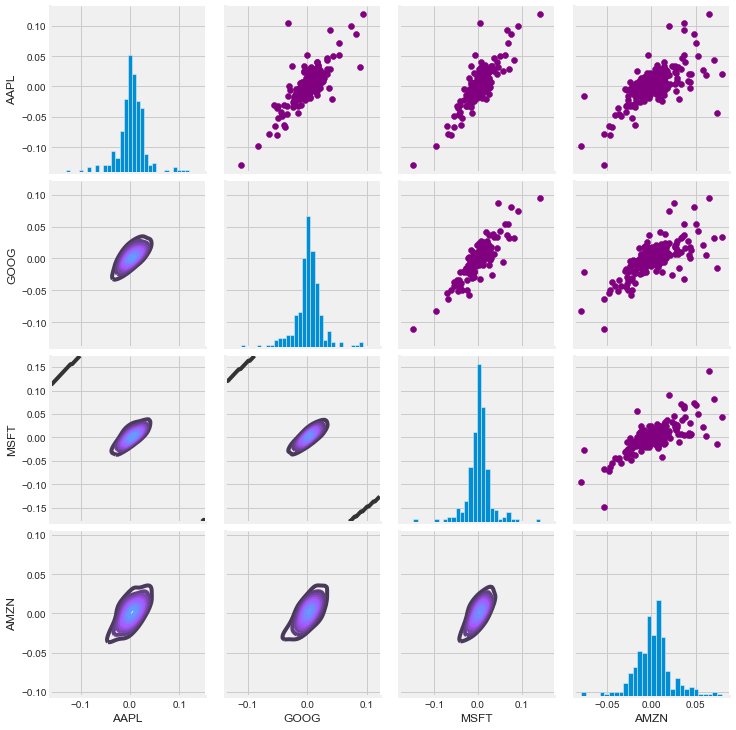

In [129]:
#The correlation can be done by using Seaborn sns.pairplot to examine the correlation of invidual stocks

#Define return_figure using PairGrid
return_fig = sns.PairGrid(tech_rets.dropna())

#Using map_upper we can specify what upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

#we can also define the lower triagle in the figure
#Color map()
return_fig.map_lower(sns.kdeplot,cmap='cool_d')

#define the diagonal as a series of histrogram plot of the daily return
return_fig.map_diag(plt.hist, bins=30)



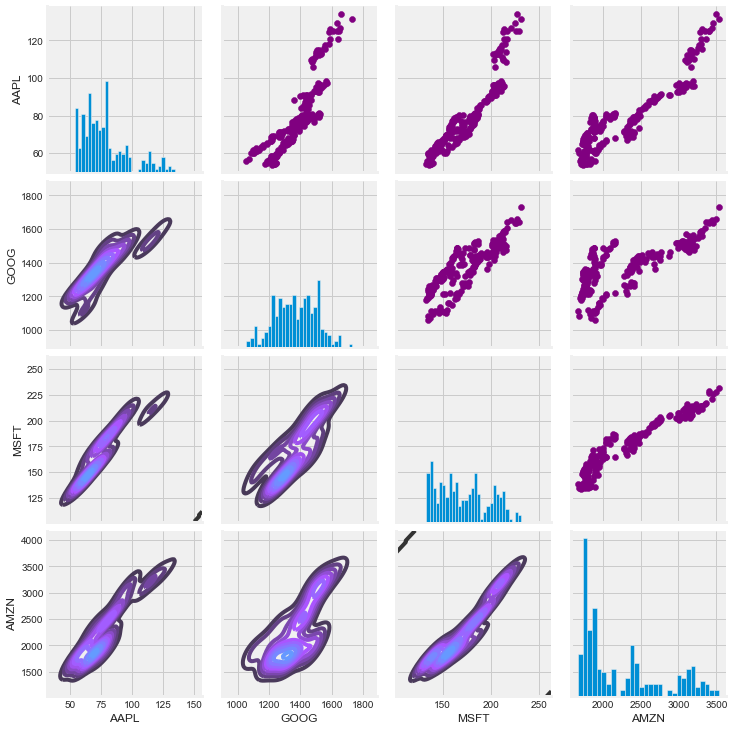

In [130]:
#Define return_figure using PairGrid
return_fig = sns.PairGrid(closing_df)

#Using map_upper we can specify what upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

#we can also define the lower triagle in the figure
#Colo map()
return_fig.map_lower(sns.kdeplot,cmap='cool_d')

#define the diagonal as a series of histrogram plot of the daily return
return_fig.map_diag(plt.hist, bins=30)



<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

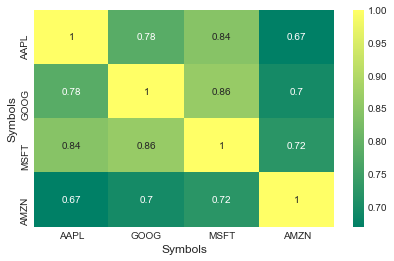

In [131]:
# Quick corellation on plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True,cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

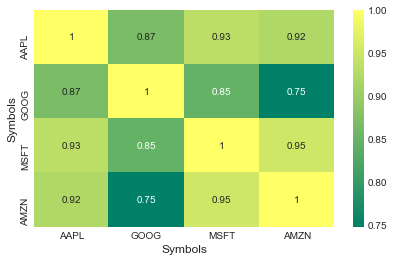

In [132]:

sns.heatmap(closing_df.corr(), annot=True,cmap='summer')

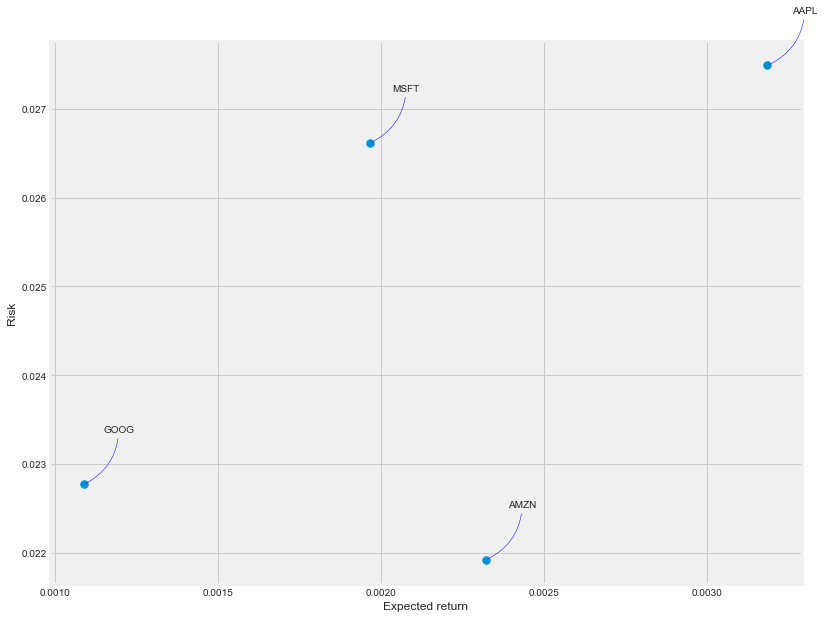

In [133]:
#New DataFrame withou the version of origianl Tech_rets DataFrame

rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [134]:
#6. Predict the stocK LEMONDADE
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the price over time
df

High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-03   14.732142   14.607142   14.621428   14.686786  302220800.0   
2012-01-04   14.810000   14.617143   14.642858   14.765715  260022000.0   
2012-01-05   14.948215   14.738214   14.819643   14.929643  271269600.0   
2012-01-06   15.098214   14.972143   14.991786   15.085714  318292800.0   
2012-01-09   15.276786   15.048214   15.196428   15.061786  394024400.0   
...                ...         ...         ...         ...          ...   
2020-09-04  123.699997  110.889999  120.070000  120.959999  332607200.0   
2020-09-08  118.989998  112.680000  113.949997  112.820000  231366600.0   
2020-09-09  119.139999  115.260002  117.260002  117.320000  176940500.0   
2020-09-10  120.500000  112.500000  120.360001  113.489998  182274400.0   
2020-09-11  115.230003  110.000000  114.570000  112.000000  180487500.0   

             Adj Close  
Date                    
2012-01-03   12.691425  
2012-01-04   12.759631  
2012-01-05   12.901293  
2012-01-06   13.036158  
2012-01-09   13.015480  
...                ...  
2020-09-04  120.959999  
2020-09-08  112.820000  
2020-09-09  117.320000  
2020-09-10  113.489998  
2020-09-11  112.000000  

[2188 rows x 6 columns]

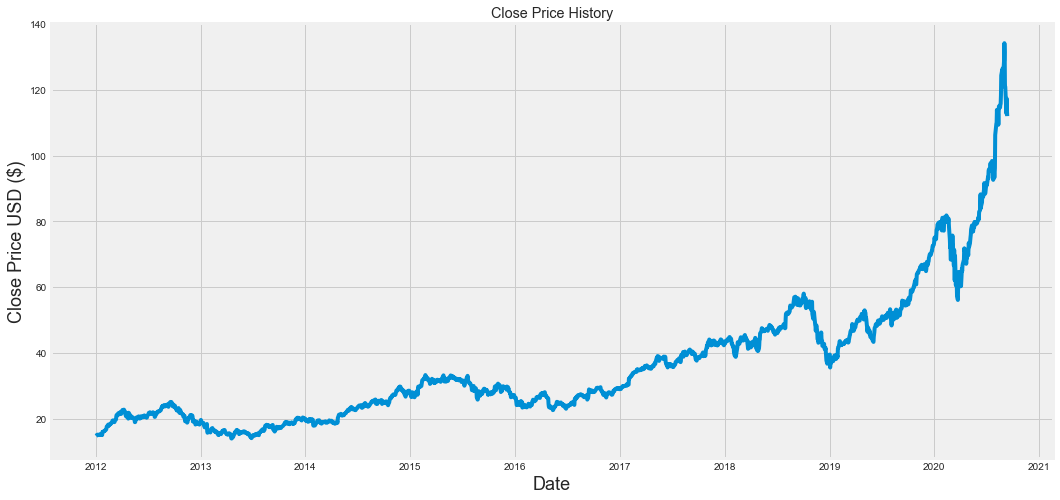

In [135]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [136]:
data=df.filter(['Close'])
#convert the dataframe to the numpy array
dataset=data.values
#Get the number of rows to train the model on 
training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data_len

1751

In [137]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.85977174],
       [0.82791678],
       [0.81552414]])

In [138]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [139]:
#Build the LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1691/1691 [==============================] - 15s 9ms/step - loss: 2.9578e-04


In [140]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.267584736702633

In [141]:
data


Close
Date                  
2012-01-03   14.686786
2012-01-04   14.765715
2012-01-05   14.929643
2012-01-06   15.085714
2012-01-09   15.061786
...                ...
2020-09-04  120.959999
2020-09-08  112.820000
2020-09-09  117.320000
2020-09-10  113.489998
2020-09-11  112.000000

[2188 rows x 1 columns]

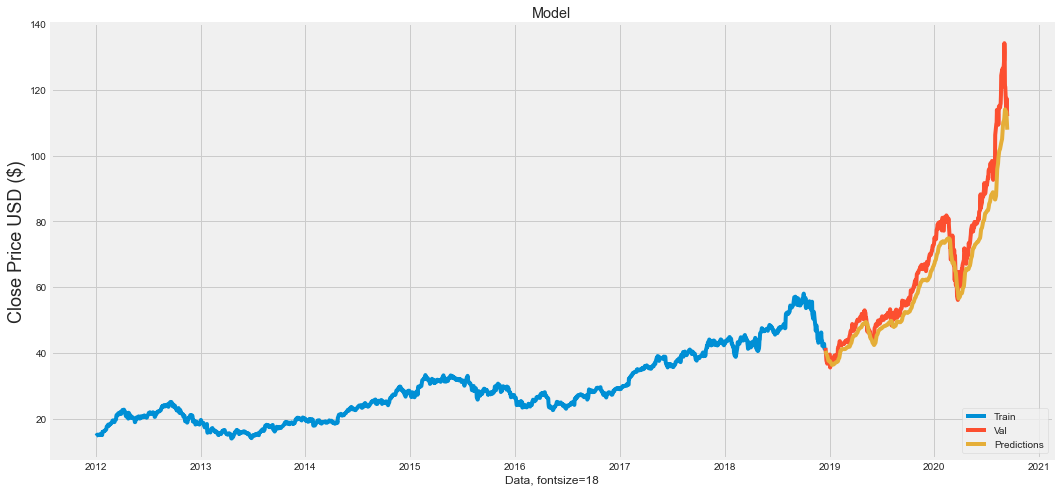

In [142]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data, fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [143]:
#Show the valid and predicted prices
valid

Close  Predictions
Date                               
2018-12-18   41.517502    40.613136
2018-12-19   40.222500    40.361423
2018-12-20   39.207500    40.047955
2018-12-21   37.682499    39.637722
2018-12-24   36.707500    39.071663
...                ...          ...
2020-09-04  120.959999   113.864037
2020-09-08  112.820000   113.141174
2020-09-09  117.320000   111.358009
2020-09-10  113.489998   109.709366
2020-09-11  112.000000   107.860870

[437 rows x 2 columns]